In [1]:
#Depndencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from scipy.stats import linregress

In [2]:
#Import vaccination CSV
lga_vacc = pd.read_csv("Resources/Vaccination_by_LGA.csv")
lga_vacc = lga_vacc.rename(columns={"Dose 1 % coverage of 15+" : "First Dose %", 
                                    "Dose 2 % coverage of 15+" : "Second Dose %"})
lga_vacc

,LGA Name,Jurisdiction,Remoteness,First Dose %,Second Dose %,Population aged 15+
0,Unincorporated ACT,Australian Capital Territory,Major Cities of Australia,0.63,0.40,"345,325"
1,Albury (C),New South Wales,Inner Regional Australia,0.59,0.30,"43,782"
2,Armidale Regional (A),New South Wales,Inner Regional Australia,0.60,0.32,"25,368"
3,Ballina (A),New South Wales,Inner Regional Australia,0.62,0.38,"37,124"
4,Balranald (A),New South Wales,Outer Regional Australia,0.44,0.27,"1,859"
...,...,...,...,...,...,...
539,Wyalkatchem (S),Western Australia,Outer Regional Australia,0.56,0.22,422
540,Wyndham-East Kimberley (S),Western Australia,Very Remote Australia - see note and refer to ...,NaN,NaN,"5,585"
541,Yalgoo (S),Western Australia,Very Remote Australia - see note and refer to ...,NaN,NaN,320
542,Yilgarn (S),Western Australia,Remote Australia - see note and refer to SA4 data,NaN,NaN,969


In [3]:
#import covid cases csv
lga_covid = pd.read_csv("Resources/Cases_by_LGA_20210921.csv")
lga_covid = lga_covid.rename(columns={"Localgovernmentarea" : "LGA Name"})
lga_covid

,diagnosis_date,LGA Name
0,11/03/2020,Greater Geelong (C)
1,8/03/2020,Mornington Peninsula (S)
2,9/03/2020,Port Phillip (C)
3,1/08/2020,Whittlesea (C)
4,1/03/2020,Casey (C)
...,...,...
29591,20/09/2021,Melbourne (C)
29592,20/09/2021,Whittlesea (C)
29593,20/09/2021,Greater Geelong (C)
29594,20/09/2021,Glen Eira (C)


In [59]:
#Group cases by LGA
covid_count_df = lga_covid.groupby(["LGA Name"])
covid_count = covid_count_df["diagnosis_date"].count()

In [5]:
#Check count of cases to ensure data sets match to the cases by age group data
covid_count.sum()

29596

In [6]:
#Create new dataframe with counts per LGA
lga_covid_count = pd.DataFrame({"Covid Cases" : covid_count})
lga_covid_count

,Covid Cases
LGA Name,
Alpine (S),1
Ararat (RC),8
Ballarat (C),76
Banyule (C),560
Bass Coast (S),13
...,...
Wodonga (C),3
Wyndham (C),3125
Yarra (C),574


In [61]:
#Merge case number and vaccination dataframes
merged_df = pd.merge(lga_covid_count, lga_vacc, how="inner", on="LGA Name" )
merged_df

,LGA Name,Covid Cases,Jurisdiction,Remoteness,First Dose %,Second Dose %,Population aged 15+
0,Alpine (S),1,Victoria,Inner Regional Australia,0.67,0.40,"10,732"
1,Ararat (RC),8,Victoria,Inner Regional Australia,0.64,0.46,"9,944"
2,Ballarat (C),76,Victoria,Inner Regional Australia,0.59,0.40,"88,323"
3,Banyule (C),560,Victoria,Major Cities of Australia,0.61,0.41,"107,523"
4,Bass Coast (S),13,Victoria,Inner Regional Australia,0.68,0.41,"30,332"
...,...,...,...,...,...,...,...
69,Wodonga (C),3,Victoria,Inner Regional Australia,0.60,0.35,"33,295"
70,Wyndham (C),3125,Victoria,Major Cities of Australia,0.50,0.27,"201,181"
71,Yarra (C),574,Victoria,Major Cities of Australia,0.54,0.34,"90,535"
72,Yarra Ranges (S),286,Victoria,Major Cities of Australia,0.54,0.32,"129,169"


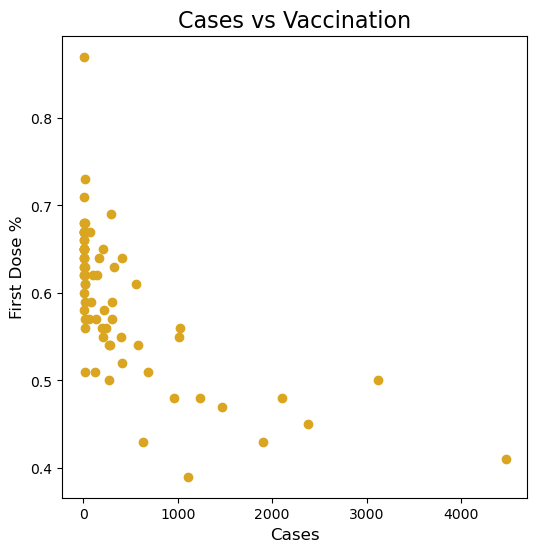

In [9]:
#Preliminary plot of case numbers vs vaccination rates
fig1, ax1 = plt.subplots(figsize=(6, 6))
x_axis = merged_df['Covid Cases']
y_axis = merged_df['First Dose %']
plt.scatter(x_axis, y_axis, color="goldenrod")
plt.title("Cases vs Vaccination",fontsize =16)
plt.xlabel("Cases",fontsize =12)
plt.ylabel("First Dose %",fontsize =12)
plt.show()

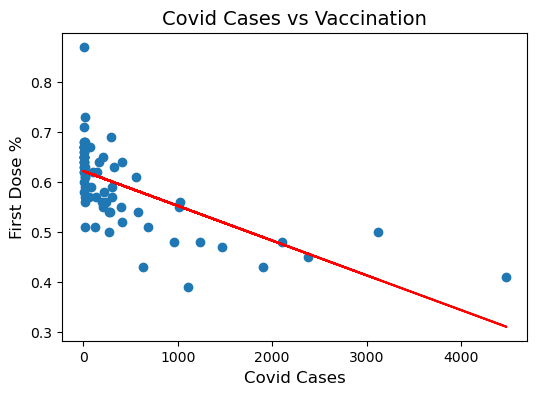

The r-squared is: 0.4184709577591137


In [58]:
#Create regression plot comparing total cases for each LGA vs LGA first dose vaccination rates
x_values = merged_df['Covid Cases']
y_values = merged_df['First Dose %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=10,color="tomato")
plt.title("Covid Cases vs Vaccination",fontsize =14)
plt.xlabel("Covid Cases",fontsize =12)
plt.ylabel("First Dose %",fontsize =12)
plt.annotate(line_eq,(21,37),fontsize=10,color="black")
plt.savefig("Chart Outputs/All cases vs Vax Rates.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

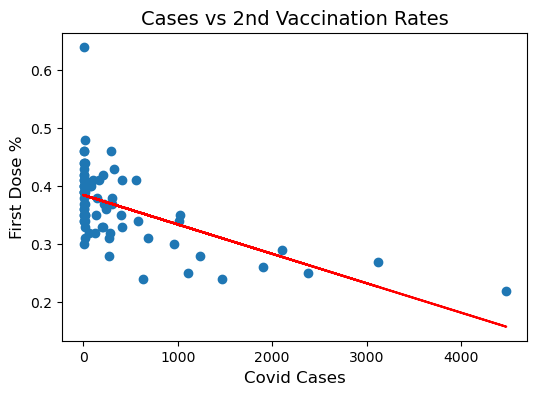

The r-squared is: 0.33831061632507514


In [63]:
#Create regression plot comparing total cases for each LGA vs LGA second dose vaccination rates
x_values = merged_df['Covid Cases']
y_values = merged_df['Second Dose %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=10,color="tomato")
plt.title("Cases vs 2nd Vaccination Rates",fontsize =14)
plt.xlabel("Covid Cases",fontsize =12)
plt.ylabel("First Dose %",fontsize =12)
plt.annotate(line_eq,(21,37),fontsize=10,color="black")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [12]:
#Format date column
lga_covid['diagnosis_date'] = pd.to_datetime(lga_covid['diagnosis_date'], dayfirst=True)

lga_covid.sort_values("diagnosis_date", ascending=True).reset_index(drop=True)

,diagnosis_date,LGA Name
0,2020-01-25,Monash (C)
1,2020-01-28,Monash (C)
2,2020-01-30,Melbourne (C)
3,2020-01-31,Melbourne (C)
4,2020-02-22,Mornington Peninsula (S)
...,...,...
29591,2021-09-20,Yarra (C)
29592,2021-09-20,Melton (C)
29593,2021-09-20,Monash (C)
29594,2021-09-20,Hume (C)


In [13]:
#Determine timeframes for the three COvid waves in Vic

#Create dataframe of daily case numbers for all LGA's
cases_per_day = lga_covid.groupby(["diagnosis_date"])
daily_cases = cases_per_day.count().reset_index()
daily_cases

,diagnosis_date,LGA Name
0,2020-01-25,1
1,2020-01-28,1
2,2020-01-30,1
3,2020-01-31,1
4,2020-02-22,2
...,...,...
440,2021-09-16,511
441,2021-09-17,518
442,2021-09-18,500
443,2021-09-19,563


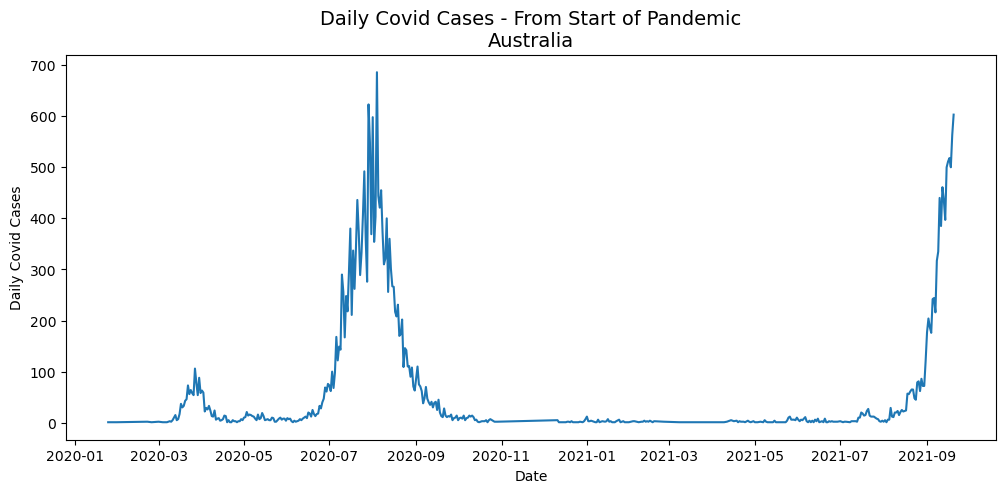

In [47]:
#Graph case numbers since start of pandemic to determine start and finish dates of each outbreak 
x_axis = daily_cases["diagnosis_date"]
y_axis = daily_cases["LGA Name"]

fig1, ax1 = plt.subplots(figsize=(12,5))
plt.plot(x_axis, y_axis)

plt.title('Daily Covid Cases - From Start of Pandemic\nAustralia', size="14")
plt.xlabel('Date')
plt.ylabel('Daily Covid Cases')
plt.savefig("Chart Outputs/Daily Covid Cases.png")
plt.show()

In [15]:
#Create dataframe of cases covering first outbreak
date_df_first = lga_covid[(lga_covid['diagnosis_date'] > '2020-03-01') & (lga_covid['diagnosis_date'] <= '2020-04-30')]
covid_first_df = date_df_first.groupby(["LGA Name"])
covid_count_first = covid_first_df["diagnosis_date"].count()

lga_covid_first = pd.DataFrame({"Covid Cases" : covid_count_first})
lga_covid_first

,Covid Cases
LGA Name,
Ararat (RC),1
Ballarat (C),8
Banyule (C),82
Bass Coast (S),4
Baw Baw (S),5
...,...
Wodonga (C),1
Wyndham (C),27
Yarra (C),27


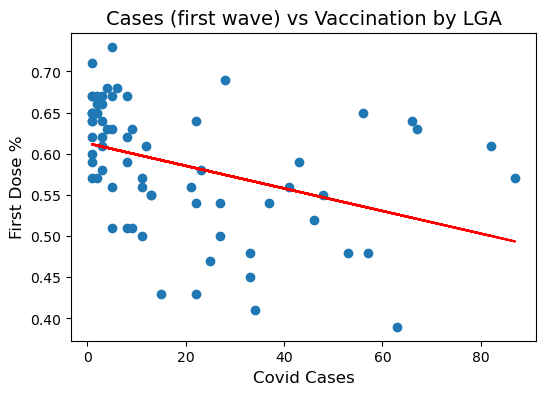

The r-squared is: 0.15026327483582252


In [37]:
#Plot cases by LGA in first wave against LGA vaccinations rates
merged_df_1 = pd.merge(lga_covid_first, lga_vacc, how="inner", on="LGA Name" )

x_values = merged_df_1['Covid Cases']
y_values = merged_df_1['First Dose %']
5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=10,color="tomato")
plt.title("Cases (first wave) vs Vaccination by LGA",fontsize =14)
plt.xlabel("Covid Cases",fontsize =12)
plt.ylabel("First Dose %",fontsize =12)
plt.annotate(line_eq,(21,37),fontsize=10,color="black")
plt.savefig("Chart Outputs/1st Wave Cases vs Vax Rates.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [17]:
#Create dataframe of cases covering second outbreak
date_df_2nd = lga_covid[(lga_covid['diagnosis_date'] > '2020-06-01') & (lga_covid['diagnosis_date'] <= '2020-11-30')]

covid_2nd_df = date_df_2nd.groupby(["LGA Name"])
covid_count_2nd = covid_2nd_df["diagnosis_date"].count()

lga_covid_2nd = pd.DataFrame({"Covid Cases" : covid_count_2nd})


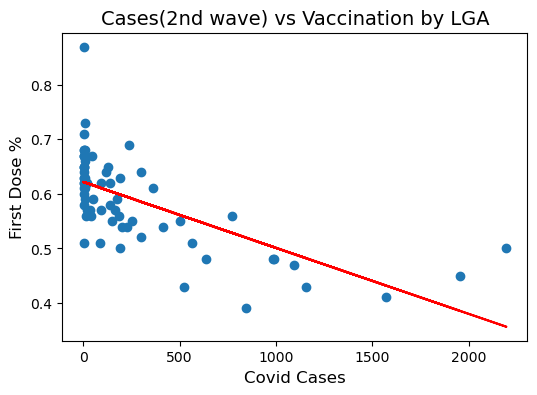

The r-squared is: 0.4374889953819302


In [38]:
#Plot cases by LGA in second wave against LGA vaccinations rates
merged_df_2 = pd.merge(lga_covid_2nd, lga_vacc, how="inner", on="LGA Name" )

x_values = merged_df_2['Covid Cases']
y_values = merged_df_2['First Dose %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=10,color="tomato")
plt.title("Cases(2nd wave) vs Vaccination by LGA",fontsize =14)
plt.xlabel("Covid Cases",fontsize =12)
plt.ylabel("First Dose %",fontsize =12)
plt.annotate(line_eq,(21,37),fontsize=10,color="black")
plt.savefig("Chart Outputs/2nd Wave Cases vs Vax Rates.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [19]:
#Plot cases by LGA in second wave against LGA vaccinations rates
date_df_3rd = lga_covid[(lga_covid['diagnosis_date'] > '2021-07-01')]
covid_3rd_df = date_df_3rd.groupby(["LGA Name"])
covid_count_3rd = covid_3rd_df["diagnosis_date"].count()

lga_covid_3rd = pd.DataFrame({"Covid Cases" : covid_count_3rd})

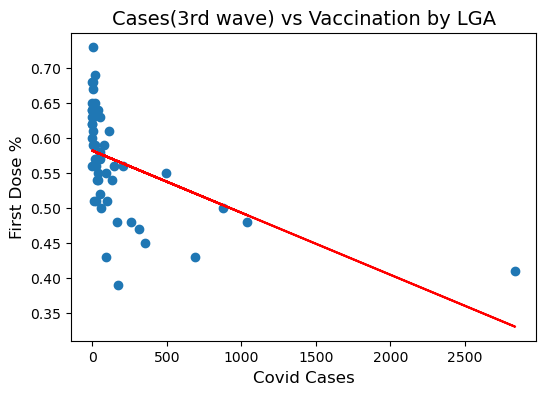

The r-squared is: 0.2500188131236804


In [36]:
#Plot vaccination rates vs cases in 3rd wave
merged_df_3 = pd.merge(lga_covid_3rd, lga_vacc, how="inner", on="LGA Name" )

x_values = merged_df_3['Covid Cases']
y_values = merged_df_3['First Dose %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=10,color="tomato")
plt.title("Cases(3rd wave) vs Vaccination by LGA",fontsize =14)
plt.xlabel("Covid Cases",fontsize =12)
plt.ylabel("First Dose %",fontsize =12)
plt.annotate(line_eq,(21,37),fontsize=10,color="black")
plt.savefig("Chart Outputs/3rd Wave Cases vs Vax Rates.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [25]:
#Determine LGA's with highest case numbers
lga_covid_count.sort_values("Covid Cases", ascending=False).head(10)

,Covid Cases
LGA Name,
Hume (C),4481
Wyndham (C),3125
Brimbank (C),2381
Moreland (C),2105
Whittlesea (C),1904
Melton (C),1466
Casey (C),1230
Melbourne (C),1111
Moonee Valley (C),1025
